In [ ]:
import numpy as np 
import pandas as pd 
import nltk
import string as s
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import  confusion_matrix

In [ ]:
df_train=pd.read_csv("/content/drive/MyDrive/ag_news_csv/train.csv",header=0,names=['classid','title','desc'])
df_test=pd.read_csv("/content/drive/MyDrive/ag_news_csv/test.csv",header=0,names=['classid','title','desc'])

In [ ]:
df_train.head()

,classid,title,desc
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
df_test.head()

,classid,title,desc
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


# **Verileri girdi ve etiket olarak bölme**

In [ ]:
train_x=df_train.desc[:60000]
test_x=df_test.desc
train_y=df_train.classid[:60000]
test_y=df_test.classid

# Veri dağılımını kontrol **etme**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


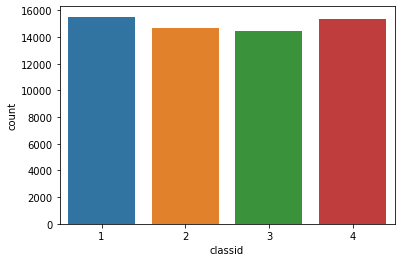

In [ ]:
df=df_train[:60000]
sns.countplot(df.classid);

# **Wordcloud kütüphanesine göre dağılımlar**

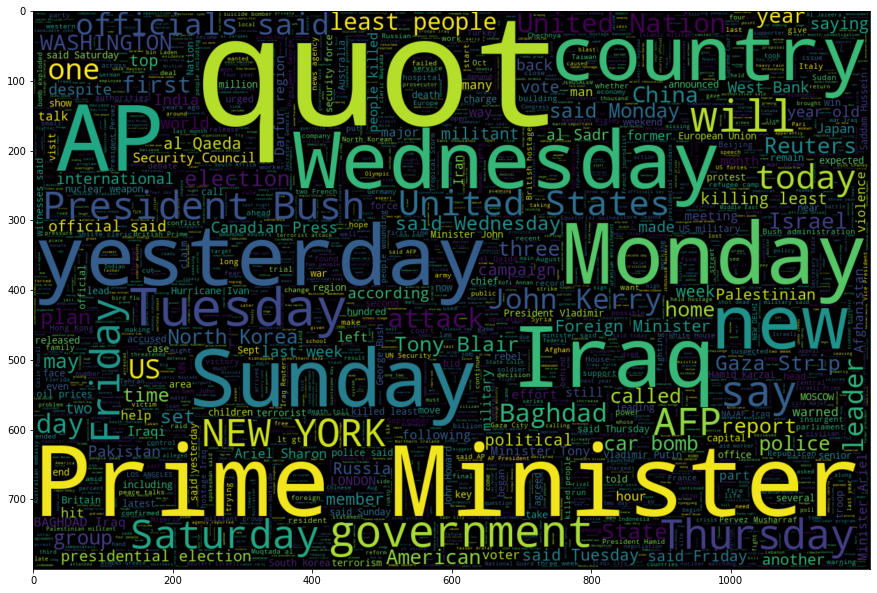

In [ ]:
world = df.desc[df.classid[df.classid==1].index]
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(world))
plt.imshow(wordcloud,interpolation = 'bilinear');

In [ ]:
sports = df.desc[df.classid[df.classid==2].index]

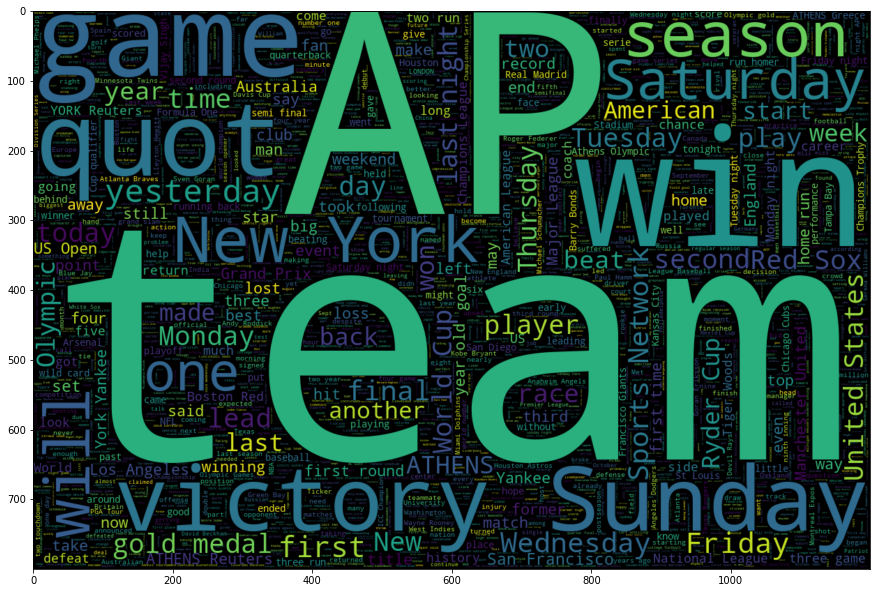

In [ ]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(sports))
plt.imshow(wordcloud,interpolation = 'bilinear');

In [ ]:
biz = df.desc[df.classid[df.classid==3].index]

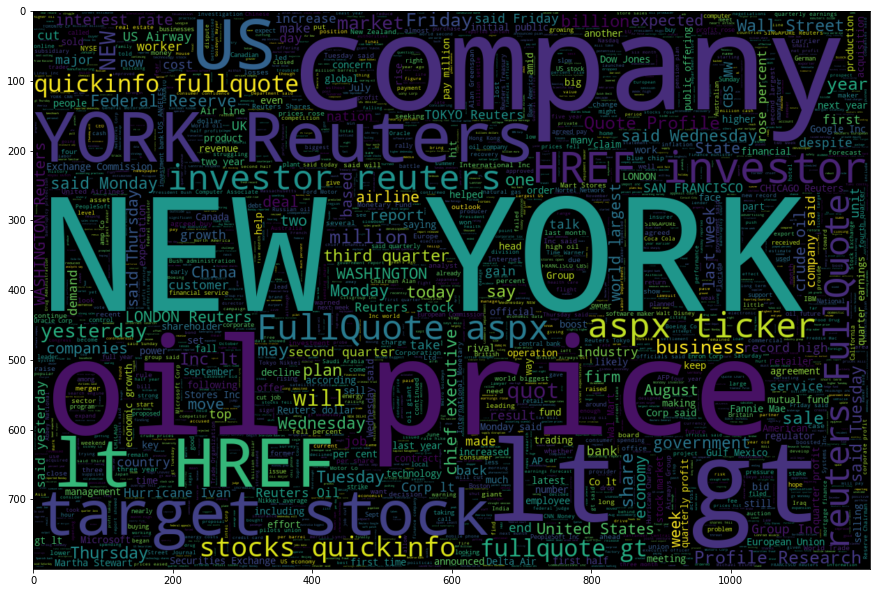

In [ ]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(biz))
plt.imshow(wordcloud,interpolation = 'bilinear');

In [ ]:
sci = df.desc[df.classid[df.classid==4].index]

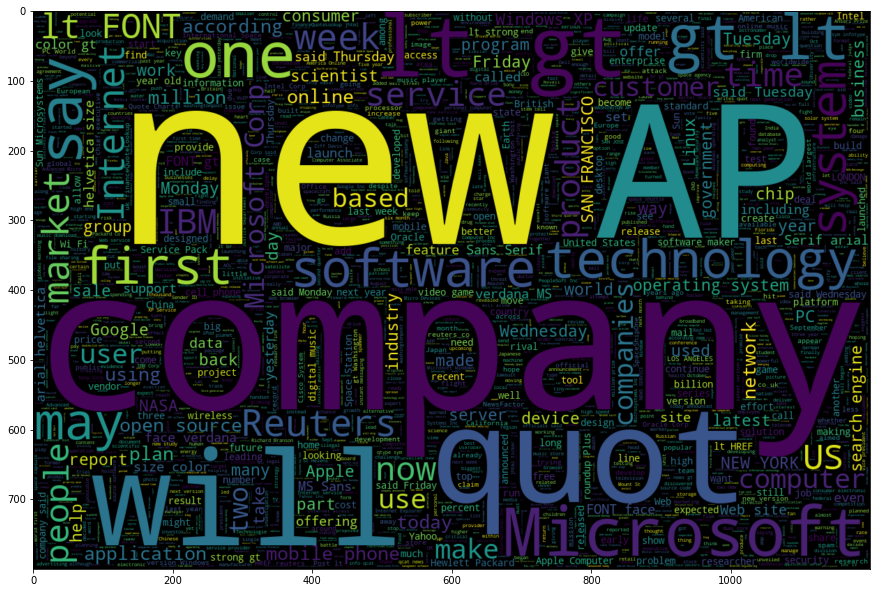

In [ ]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(sci))
plt.imshow(wordcloud,interpolation = 'bilinear');

## **Tokenizasyon**

In [ ]:
def tokenization(text):
    lst=text.split()
    return lst
train_x=train_x.apply(tokenization)
test_x=test_x.apply(tokenization)

# **Noktalama İşaretlerinin kaldırılması**

In [ ]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for  j in  s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_punctuations) 
test_x=test_x.apply(remove_punctuations)

# **Küçük harfe dönüştürme**

In [ ]:
def lowercasing(lst):
    new_lst=[]
    for  i in  lst:
        i=i.lower()
        new_lst.append(i) 
    return new_lst
train_x=train_x.apply(lowercasing)
test_x=test_x.apply(lowercasing)

# **Rakam-Sayıların kaldırılması**

In [ ]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]

    for i in  lst:
        for j in  s.digits:
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_numbers)
test_x=test_x.apply(remove_numbers)

In [ ]:
nltk.download("stopwords")##ntlk kütüphanesi yüklenmemiş tekrar yüklendi
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# **Stopwords'lerin kaldırılması**

In [ ]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x=train_x.apply(remove_stopwords)
test_x=test_x.apply(remove_stopwords)  

# **Lemmatizasyon**

In [ ]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(lemmatzation)
test_x=test_x.apply(lemmatzation)

In [ ]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' '  for i in x))

# Future sayısı maximum 10000 seçildi (Future Extraction)

In [ ]:
from sklearn.feature_extraction.text  import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=10000,min_df=6)
train_1=tfidf.fit_transform(train_x)
test_1=tfidf.transform(test_x)
print("No. of features extracted")
print(len(tfidf.get_feature_names()))
print(tfidf.get_feature_names()[:20])

train_arr=train_1.toarray()
test_arr=test_1.toarray()

No. of features extracted
10000
['aa', 'aapl', 'aaron', 'ab', 'ababa', 'abandon', 'abandoned', 'abandoning', 'abarrel', 'abbas', 'abbey', 'abc', 'abducted', 'abduction', 'abductor', 'abdul', 'abdullah', 'ability', 'ablaze', 'able']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# **Naive Bayes Kullanarak Eğitim**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_MN=MultinomialNB()
NB_MN.fit(train_arr,train_y)
pred=NB_MN.predict(test_arr)

print("İlk 20 Gerçek Katman")
print(test_y.tolist()[:20])
print("İlk 20 Tahmin")
print(pred.tolist()[:20])

İlk 20 Gerçek Katman
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
İlk 20 Tahmin
[3, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]


In [ ]:
def eval_model(y,y_pred):
    print("F1 score ")
    print(f1_score(y,y_pred,average='micro'))
    print("Accuracy ")
    print(accuracy_score(y,y_pred))
    print("Accuracy ")
    print(round(accuracy_score(y,y_pred)*100,3),"%")

In [ ]:
def confusion_mat(color):
    cof=confusion_matrix(test_y, pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

In [ ]:
eval_model(test_y,pred)
    
a=round(accuracy_score(test_y,pred)*100,3)

F1 score 
0.8814473684210526
Accuracy 
0.8814473684210526
Accuracy 
88.145 %


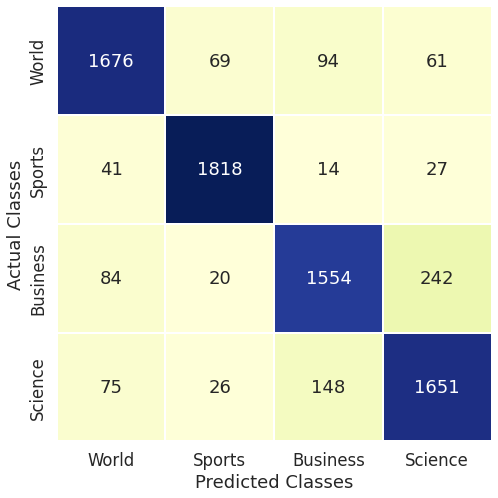

In [ ]:
confusion_mat('YlGnBu')

# **SGD Kullanarak Eğtim**

In [ ]:
from sklearn.linear_model import SGDClassifier
SGD=SGDClassifier()
SGD.fit(train_arr,train_y)
pred_2=SGD.predict(test_arr)


In [ ]:
eval_model(test_y,pred_2)
    
d=round(accuracy_score(test_y,pred_2)*100,3)

F1 score 
0.8873684210526316
Accuracy 
0.8873684210526316
Accuracy 
88.737 %


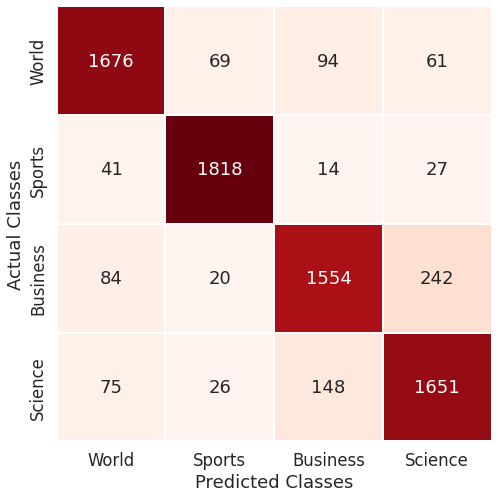

In [ ]:
confusion_mat('Reds')

Lstm kullanarak yapmaya çalıştım fakat bir şekilde çöktü.

automl kullanmaya çalıştım fakat colabda çalıştıramadım.